In [1]:
from pathlib import Path

cwd = Path.cwd()
DATA_PATH = cwd.parent / 'datasets' /'Image Sets' /'Entrega 1'/'XY51_p10'

# DATA = DATA_PATH / 'o9073g0267o.1655422.ch.2328134.XY51.p10.fits'


In [2]:
# DATA_PATH = cwd.parent / 'datasets' /'Image Sets' /' Entrega 1'
# p = DATA_PATH.parent.glob('**/*')
# files = [x for x in p if x.is_file()]
# files

# str(DATA).replace('\\','/')

---
# Leer Datos de Fits

Se leen los datos .fits con la librería astropy


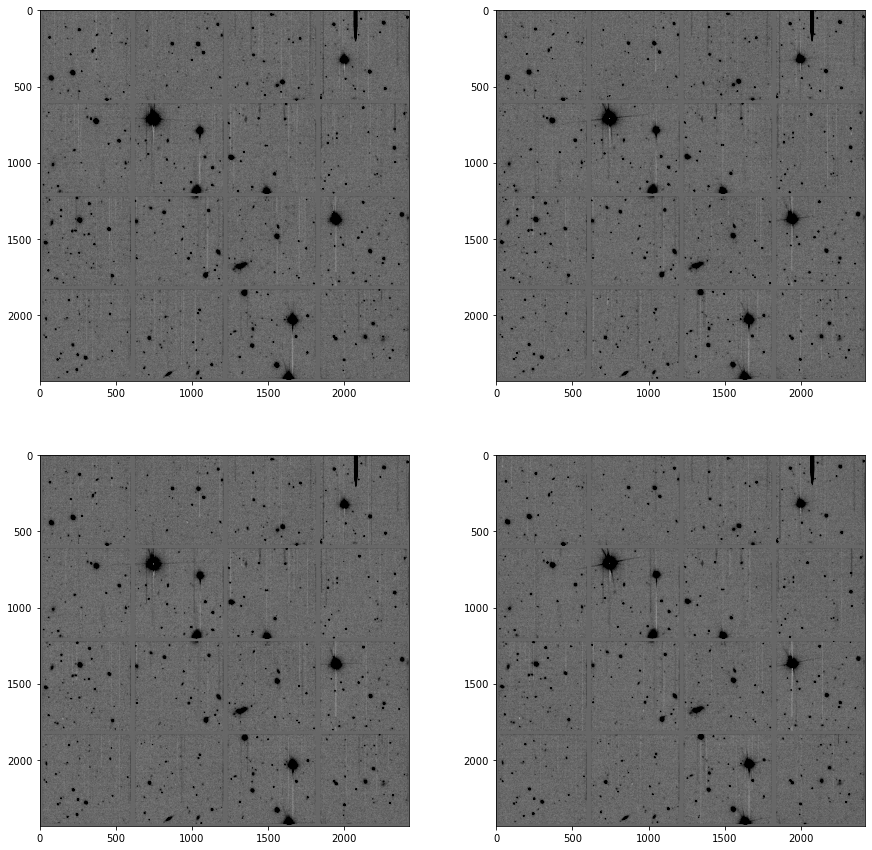

In [3]:
from astropy.io import fits 
import matplotlib.pyplot as plt

datasets=[
    DATA_PATH / 'o9073g0267o.1655422.ch.2328134.XY51.p10.fits',
    DATA_PATH / 'o9073g0283o.1655438.ch.2328150.XY51.p10.fits',
    DATA_PATH / 'o9073g0299o.1655454.ch.2328166.XY51.p10.fits',
    DATA_PATH / 'o9073g0315o.1655470.ch.2328182.XY51.p10.fits',
]

vmax_value=200
vmmin_value=100
#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))


#Imprimir la imagen 1 en la posición (0.0) del arreglo

datos=fits.open(datasets[0])
img=datos[0].data
arreglo_plots[0,0].imshow(img,cmap='gray_r',vmin = vmmin_value,vmax = vmax_value)

datos=fits.open(datasets[1])
img=datos[0].data
arreglo_plots[1,0].imshow(img,cmap='gray_r',vmin = vmmin_value,vmax = vmax_value)


datos=fits.open(datasets[2])
img=datos[0].data
arreglo_plots[0,1].imshow(img,cmap='gray_r',vmin = vmmin_value,vmax = vmax_value)


datos=fits.open(datasets[3])
img=datos[0].data
arreglo_plots[1,1].imshow(img,cmap='gray_r',vmin = vmmin_value,vmax = vmax_value)

---
## Se observa el histograma de la imagen

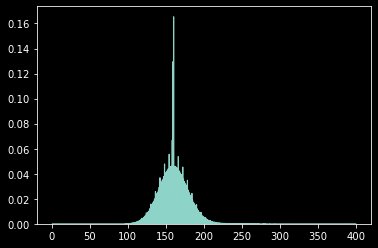

In [12]:
datos=fits.open(datasets[1])
plt.style.use('dark_background')
img_original = datos[0].data
img_array_i = img_original.ravel();
plt.hist(img_array_i,histtype='step', bins=1000, 
                            range=(0.0, 400),density=True);

---
# Normalización del Histograma

Se realiza una expansión (normalización) del histograma para que la salida este entre 0 y 255


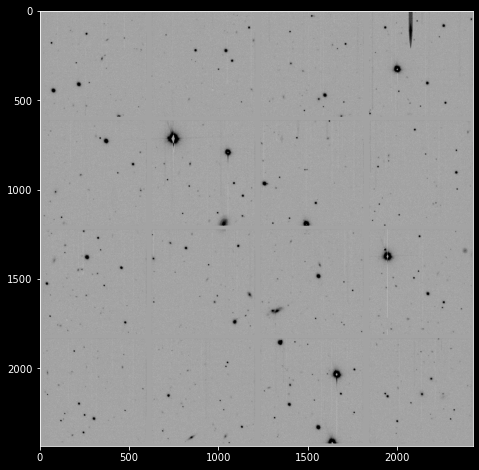

In [65]:
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:] = f(img[:,:], *args)    
    return res

def histogram_expansion(img):
    
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros([img.shape[0], img.shape[1]], dtype=np.float32)
    
    #Extraer el mínimo y el máximo del conjunto de datos
    m = float(np.min(img))
    M = float(np.max(img))
    #Aplicar la función de expansión(normalización) y asegurar datos uint8
    res = (img-m)*255.0/(M-m)
    res = res.astype(np.uint8)
    
    return res

img = np.clip(img,0,400)

res = apply_f_on_rgb(img, histogram_expansion, [])
fig = plt.figure(figsize=(8,8))
plt.imshow(res,cmap='gray_r')


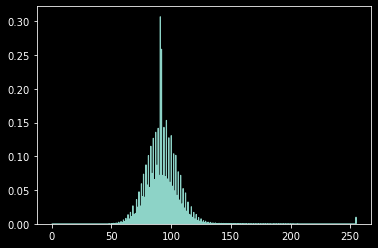

In [28]:
img_array_i = res.ravel();
plt.hist(img_array_i,histtype='step', bins=1000, 
                            range=(0.0,255),density=True);

---

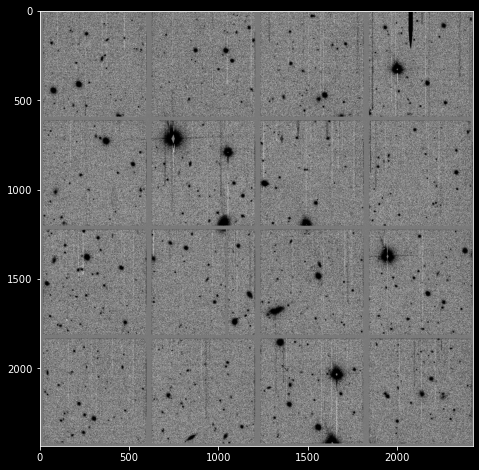

In [30]:
import cv2
res_2= cv2.equalizeHist(res)
fig = plt.figure(figsize=(8,8))
plt.imshow(res_2,cmap='gray_r')

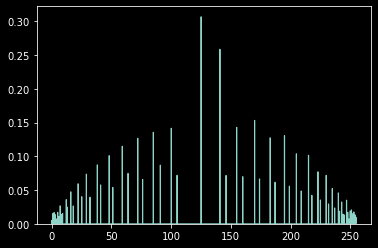

In [31]:
img_array_i = res_2.ravel();
plt.hist(img_array_i,histtype='step', bins=1000, 
                            range=(0.0,255),density=True);

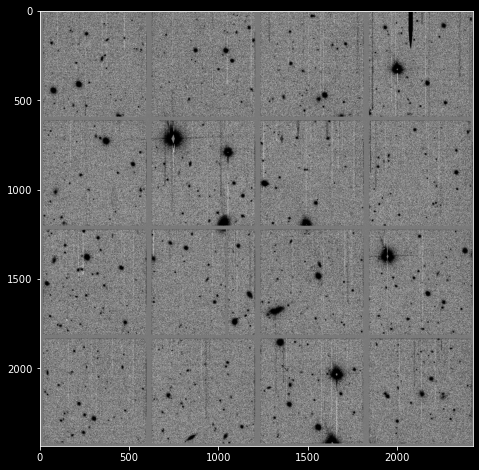

In [34]:

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res
a = 1
gamma = 1
res_3 = apply_f_on_rgb(res_2, gamma_correction, [a, gamma])
fig = plt.figure(figsize=(8,8))
plt.imshow(res_2,cmap='gray_r')

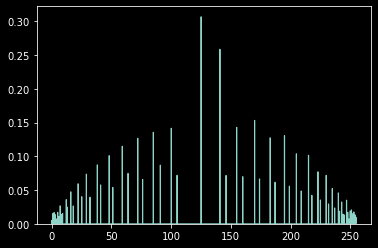

In [35]:
img_array_i = res_3.ravel();
plt.hist(img_array_i,histtype='step', bins=1000, 
                            range=(0.0,255),density=True);

---


# Canny Testing


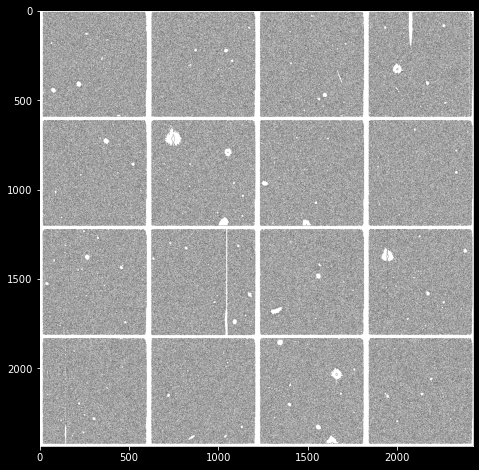

In [51]:
edges = cv2.Canny(res_3,100,200)
edges[edges<128] = 0
fig = plt.figure(figsize=(8,8))
plt.imshow(edges,cmap='gray_r')

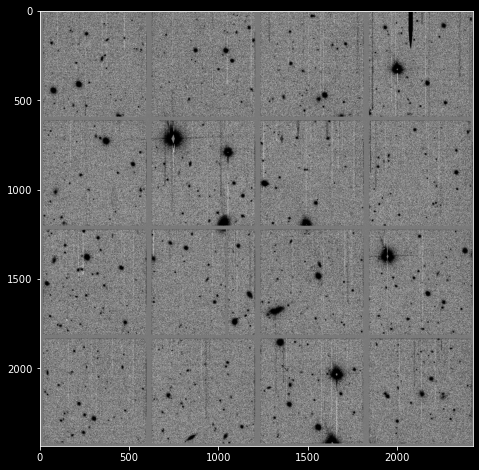

In [57]:
edges=cv2.multiply(edges,100)
img_new=cv2.add(res_3,edges)
fig = plt.figure(figsize=(8,8))
plt.imshow(img_new,cmap='gray_r')

---
# Filters

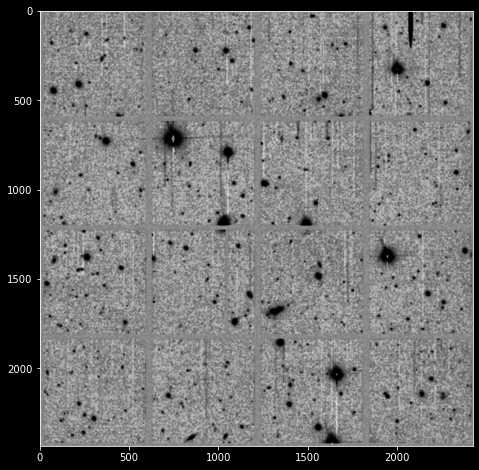

In [64]:
k_size = 9
# kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
# res_filtered = cv2.filter2D(res_3, ddepth= -1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

res_filtered = cv2.medianBlur(res_3, k_size)

fig = plt.figure(figsize=(8,8))
plt.imshow(res_filtered,cmap='gray_r')